# SCI-KIT LEARN

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
type(boston['data'])

numpy.ndarray

In [7]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
clf = RandomForestRegressor()

In [11]:
clf.fit(boston['data'],boston['target'])

RandomForestRegressor()

In [12]:
clf.score(boston['data'],boston['target'])

0.9831427098486915

In [13]:
clf.n_features_

13

In [14]:
boston['data'].shape

(506, 13)

In [16]:
row = boston['data'][17]
row.shape

(13,)

In [17]:
row.reshape(-1,13)

array([[  0.7842,   0.    ,   8.14  ,   0.    ,   0.538 ,   5.99  ,
         81.7   ,   4.2579,   4.    , 307.    ,  21.    , 386.75  ,
         14.67  ]])

In [18]:
clf.predict(row.reshape(-1,13))

array([17.57])

In [19]:
boston['target'][17]

17.5

#### Understand Train / test splits

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(boston['data'],boston['target'],test_size=0.3)

In [23]:
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7724460792284656

#### Preprocess data

In [25]:
import pandas as pd

In [28]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
print(df.max(axis=0))

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64


In [32]:
from sklearn.svm import SVR

In [34]:
clf = SVR()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.13607212578801497

In [35]:
from sklearn import preprocessing

In [37]:
xs = preprocessing.scale(boston['data'])
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
print(df.max(axis=0))

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
dtype: float64


In [38]:
xs_train,xs_test,ys_train,ys_test = train_test_split(xs,boston['target'],test_size=0.3)

In [39]:
clf = SVR()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.13607212578801497

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=5)
pca.fit(boston['data'])

PCA(n_components=5)

In [44]:
xp = pca.transform(boston['data'])
xp.shape

(506, 5)

#### Compose Pipelines

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [46]:
pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca',PCA(n_components=4)),
    ('svr',SVR()),
])

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
boston = load_boston()

In [6]:
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df['price'] = boston['target']

In [8]:
hdf = df.head(10)
hdf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
hdf.style.highlight_max()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [10]:
hdf.style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [11]:
hdf.style.bar()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [13]:
def odd_green(val):
    if val %2 != 0:
        return 'color:green'
    return ''

In [14]:
hdf.style.applymap(odd_green)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


In [15]:
def orange10(val):
    if val  > 10:
        return 'background-color:orange'
    return ''

In [16]:
hdf.style.applymap(odd_green).applymap(orange10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0.000000,0.458000,6.998000,45.800000,6.062200,3.000000,222.000000,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0.000000,0.458000,7.147000,54.200000,6.062200,3.000000,222.000000,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0.000000,0.458000,6.430000,58.700000,6.062200,3.000000,222.000000,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0.000000,0.524000,6.012000,66.600000,5.560500,5.000000,311.000000,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0.000000,0.524000,6.172000,96.100000,5.950500,5.000000,311.000000,15.200000,396.900000,19.150000,27.100000
8,0.211240,12.500000,7.870000,0.000000,0.524000,5.631000,100.000000,6.082100,5.000000,311.000000,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.004000,85.900000,6.592100,5.000000,311.000000,15.200000,386.710000,17.100000,18.900000


ModuleNotFoundError: No module named 'qgrid'

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [19]:
xs = np.linspace(-6,6,100)
ys = np.sinc(xs)

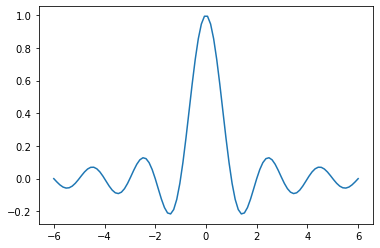

In [20]:
plt.plot(xs,ys)

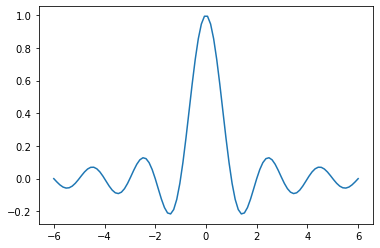

In [26]:
plt.plot(xs,ys,label=r'$\frac{sin(x)}(x)$')

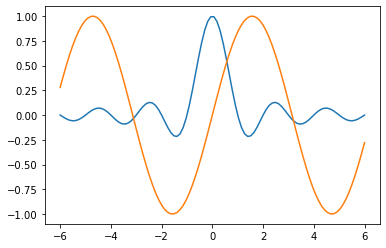

In [39]:
plt.plot(xs,ys,label=r'$\frac{sin(x)}(x)$')
plt.plot(xs,np.sin(xs),label='sin(x)')
# plt.legend()

AttributeError: module 'matplotlib.pyplot' has no attribute 'sbuplot'

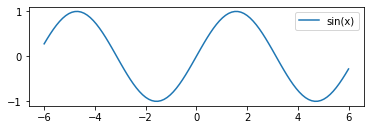

In [40]:
plt.subplot(2,1,1)
plt.plot(xs,np.sin(xs),label='sin(x)')
plt.legend()
plt.sbuplot(2,1,2)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

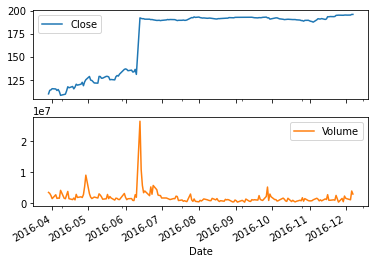

In [46]:
%matplotlib inline
df = pd.read_csv('lnkd.csv',parse_dates=['Date'],index_col='Date')
df[['Close','Volume']].plot(subplots=True)

In [48]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [49]:
df = pd.read_csv('lnkd.csv',parse_dates=['Date'])


In [50]:
from bokeh.plotting import figure ,show